**Общая информация**

**Срок сдачи:** 21 октября 2019, 08:30 

**Штраф за опоздание:** по 0.5 балла за 24 часа задержки. Через 10 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0919, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_20newsgroups
import scipy as sp
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier, KDTree
import scipy
%load_ext pycodestyle_magic

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

In [36]:
#%%pycodestyle


class MyKNeighborsClassifier (NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.e = self.classes.shape[0]
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X, leaf_size = 39)
       
    def predict(self, X):
        ans = np.arange(X.shape[0])
        if self.algorithm == 'brute':
            b = np.argpartition(pairwise_distances
            (X, self.X,self.metric), self.n_neighbors,axis = 1)[::1,0:self.n_neighbors:1]
        elif self.algorithm == 'kd_tree':
            b = np.asarray(self.tree.query(X[::1], k = self.n_neighbors)[1])
        a0 = X.shape[0]
        a1 = self.n_neighbors
        for i in range(a0):
            for j in range(a1):
                b[i,j] = self.y[b[i,j]]
        for i in range(a0):
            t, co= np.unique(b[i], return_counts = True) 
            ans[i] = t[co.argmax()]
        return ans
        pass

    def predict_proba(self, X):
        b = np.asarray(0)
        if(self.algorithm == 'brute'):
            b=np.argpartition(pairwise_distances(X, self.X, self.metric),
                              self.n_neighbors, axis=1)[::1, 0:self.n_neighbors:1]
        elif(self.algorithm == 'kd_tree'):
            b = np.asarray(self.tree.query(X[::1], k = self.n_neighbors)[1])
        ans = np.zeros(shape = (X.shape[0], self.e))
        a0 = X.shape[0]
        a1 = b.shape[1]
        for i in range(a0):
            for j in range(a1):
                b[i,j] = self.y[b[i,j]]
        for i in range(a0):
            t, co= np.unique(b[i], return_counts = True) 
            for j in range(co.shape[0]):
                ans[i,t[j]] = co[j] / a1
        return ans
        pass

    def score(self, X, y):
        ans = self.predict(X)
        res = 0
        s = len(y)
        for i in range(s):
            res = res + (y[i] == ans[i])
        return res / s
        pass

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [37]:
iris = datasets.load_iris()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
X_train.shape[0]

135

In [39]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [40]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
my_clf.fit(X_train, y_train)
my_clf.score(X_test, y_test)


0.9333333333333333

In [41]:
my_clf.predict_proba(X_train)

array([[0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. 

In [42]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy

In [43]:
%time clf.fit(X_train, y_train)

CPU times: user 2.32 ms, sys: 134 µs, total: 2.45 ms
Wall time: 1.62 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [45]:
%time my_clf.fit(X_train, y_train)

CPU times: user 376 µs, sys: 22 µs, total: 398 µs
Wall time: 321 µs


In [46]:
%time clf.predict(X_test)

CPU times: user 2.24 ms, sys: 7.67 ms, total: 9.9 ms
Wall time: 6.67 ms


array([0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1])

In [47]:
%time my_clf.predict(X_test)

CPU times: user 6.51 ms, sys: 3.68 ms, total: 10.2 ms
Wall time: 6.26 ms


array([0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1])

In [49]:
%time clf.predict_proba(X_test)

CPU times: user 1.86 ms, sys: 4.09 ms, total: 5.95 ms
Wall time: 3.62 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [14]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 3.79 ms, total: 3.79 ms
Wall time: 3.91 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

In [50]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [52]:
%time clf.fit(X_train, y_train)

CPU times: user 2.65 ms, sys: 154 µs, total: 2.8 ms
Wall time: 7.26 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [53]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.22 ms


In [54]:
%time clf.predict(X_test)

CPU times: user 7.06 ms, sys: 0 ns, total: 7.06 ms
Wall time: 5.45 ms


array([0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0])

In [55]:
%time my_clf.predict(X_test)

CPU times: user 6.46 ms, sys: 143 µs, total: 6.6 ms
Wall time: 3.92 ms


array([0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0])

In [56]:
%time clf.predict_proba(X_test)

CPU times: user 4.53 ms, sys: 31 µs, total: 4.56 ms
Wall time: 3.06 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [22]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.2 ms, sys: 0 ns, total: 3.2 ms
Wall time: 2.43 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [23]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [24]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [25]:
data = newsgroups['data']
target = newsgroups['target']


Переведите во всех документах все буквы в нижний регистр и замените во всех документах символы, не
являющиеся буквами и цифрами, на пробелы. Далее разбейте текста по пробельным символам на токены(термы/слова). Удалите текста, содержащие только пробелы.

In [26]:
data_tok =  list(map(lambda x:[i if i.isalpha() or i.isnumeric() else ' ' for i in x],[x.lower() for x in data]))
target = [target[k] for k in range(len(data_tok)) if data_tok[k].count(' ') != len(data_tok[k])]
data_tok = [ ''.join(k).split(' ') for k in data_tok if k.count(' ') != len(k)]
data_tok = [[x for x in k if len(x) > 0]for k in data_tok]
data_tok = np.asarray(data_tok)

In [27]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower() , map(' '.join, data_tok))), "please make sure that you lowercase the data and drop spaced texts"

Преобразуйте датасет в разреженную матрицу scipy.sparse.csr_matrix, где значение x в позиции (i, j)
означает, что в документе i слово j встретилось x раз

In [28]:
n = 0
row = list()
col = list()
dat = list()
di = dict()
for i in range(data_tok.shape[0]):
    for j in data_tok[i]:
        if (di.get(j, -1) == -1):
            di[j] = n
            n = n + 1
for i in range(data_tok.shape[0]):
    cur = set()
    for j in range(len(data_tok[i])):
        if (data_tok[i][j] not in cur):
            dat.append(data_tok[i].count(data_tok[i][j]))
            row.append(i)
            col.append(di[data_tok[i][j]])
            cur.add(data_tok[i][j])
ans = sp.sparse.csr_matrix((dat, (row, col)),shape = (data_tok.shape[0],n))

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [29]:
from sklearn.model_selection import cross_validate
clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
clf.fit(ans,target)


In [30]:
a = np.arange(10, dtype = float)
maxi = 0.0
for i in range(1,11,1):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    a[i - 1] = cross_validate(my_clf, ans, target, cv = 3)['test_score'].mean()
    if (a[i - 1] > maxi):
        maxi = a[i - 1]
        best = my_clf
from sklearn.feature_extraction.text import TfidfTransformer
gen = TfidfTransformer(use_idf = True,smooth_idf = True).fit_transform(ans, target)
k = gen
b = np.arange(10, dtype = float)
for i in range(1,11,1):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute',metric = 'cosine')
    b[i - 1] = cross_validate(my_clf, k, target, cv = 3)['test_score'].mean()
    if (b[i - 1] > maxi):
        maxi = b[i - 1]
        best = my_clf

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
gen = TfidfTransformer(use_idf = True,smooth_idf = True).fit_transform(ans)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальный score в среднем на валидации на 3 фолдах).
Постройте график зависимости среднего score от количества соседей. Можно рассмотреть число соседей от 1 до 10.

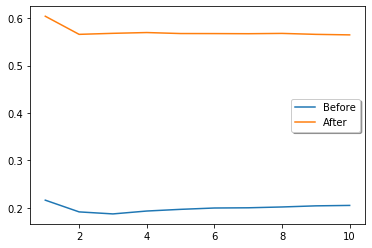

In [32]:
import matplotlib.pyplot as mat
mat.plot(np.arange(1, 11),a, label = 'Before')
mat.plot(np.arange(1,11),b, label = 'After')
mat.legend( shadow=True).get_frame()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf преобразование( sklearn.feature_extraction.text.TfidfTransformer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [33]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
data1 = newsgroups['data']
target1 = newsgroups['target']

Оценим качество(score) вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [34]:
row1 = list()
col1 = list()
dat1 = list()
data_tok1 =  list(map(lambda x:[i if i.isalpha() or i.isnumeric() else ' ' for i in x],[x.lower() for x in data1]))
target1 = [target1[k] for k in range(len(data_tok1)) if data_tok1[k].count(' ') != len(data_tok1[k])]
data_tok1 = [''.join(k).split(' ') for k in data_tok1 if k.count(' ') != len(k)]
data_tok1 = np.asarray([[x for x in k if len(x) > 0]for k in data_tok1])
for i in range(data_tok1.shape[0]):
    cur1 = set()
    for j in range(len(data_tok1[i])):
        if (data_tok1[i][j] not in cur and di.get(data_tok1[i][j], -1) != -1):
            dat1.append(data_tok1[i].count(data_tok1[i][j]))
            row1.append(i)
            col1.append(di[data_tok1[i][j]])
            cur1.add(data_tok1[i][j])
ans1 = sp.sparse.csr_matrix((dat1, (row1, col1)),shape = (data_tok1.shape[0],n))
gen1 = TfidfTransformer(use_idf = True,smooth_idf = True).fit_transform(ans1, target1)
best.fit(k,target)
best.score(gen1,target1)

0.3456013134491723

дело заключается в том, что мы выбрали лучшую модель, исходя из данных кросс-валидации, в то время, как 